In [11]:
import cvxpy as cp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('toy.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.996078,0.996078,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [13]:
n, m = data.shape

y = data.to_numpy()

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

regularizer = lambd * (cp.norm1(h_diff) + cp.norm1(v_diff))

objective = cp.Minimize(objective_fn + regularizer)

problem = cp.Problem(objective)

lambd.value = 1

problem.solve()

199.15343024925536

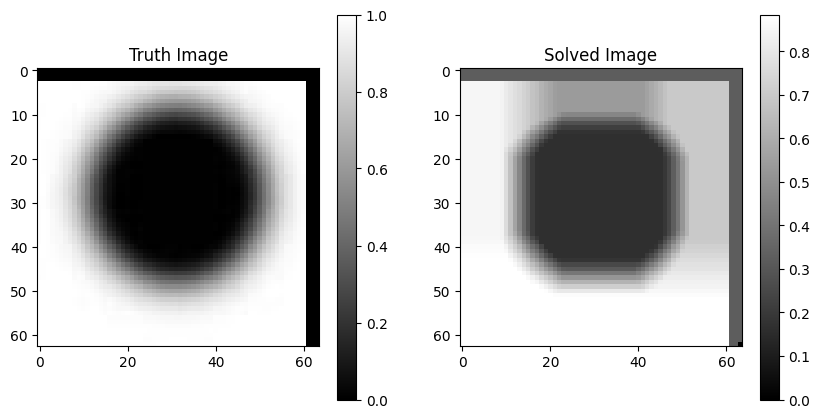

In [14]:
y_image = y.reshape((n, m))

theta_image = theta.value.reshape((n, m))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_image, cmap='gray')
plt.title("Truth Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(theta_image, cmap='gray')
plt.title("Solved Image")
plt.colorbar()

plt.show()

In [15]:
n, m = data.shape

y = data.to_numpy()

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

thet = cp.vstack([h_diff, v_diff])

norm = cp.norm(thet, p=2, axis=0)

regularizer = lambd * cp.sum(norm)

objective = cp.Minimize(objective_fn + regularizer)

problem = cp.Problem(objective)

lambd.value = 1

problem.solve()

181.56929284044793

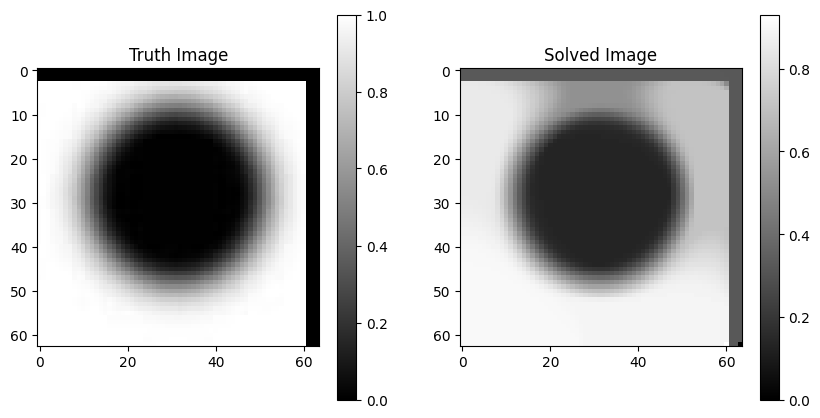

In [16]:
y_image = y

theta_image = theta.value

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(y_image, cmap='gray')
plt.title("Truth Image")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(theta_image, cmap='gray')
plt.title("Solved Image")
plt.colorbar()

plt.show()

In [17]:
image = pd.read_csv('baboon.csv', header=None).to_numpy()
image.shape
y = image

In [18]:
def plot_images(y_image, theta_images, name, lambdas, objectives, max_col=3):
    num_plots = len(theta_images) + 1

    row, col = max(1, int(np.ceil(num_plots / max_col))), min(max_col, num_plots)
    fig, axes = plt.subplots(row, col, figsize=(7 * col, 7 * row), sharey=True)

    axes[0, 0].imshow(y_image, cmap='gray')

    axes[0, 0].set_title('Truth Image')

    for i in range(1, num_plots):
        r = int(i / col)
        c = i % col

        axes[r, c].imshow(theta_images[i-1], cmap='gray')

        axes[r, c].set_title(f'{name} labmda: {lambdas[i-1]}, objective: {np.round(objectives[i-1], 3)}')

    plt.tight_layout()
    plt.show()

In [19]:
def plot_hist(lambdas, pixels, bins=100, max_col=3):
    num_plots = len(lambdas)

    row, col = max(1, int(np.ceil(num_plots / max_col))), min(max_col, num_plots)
    fig, axes = plt.subplots(row, col, figsize=(5 * col, 5 * row), sharey=True)

    for i in range(num_plots):
        r = int(i / col)
        c = i % col
        
        axes[r, c].hist(pixels[i].flatten('F'), bins=bins, edgecolor='black', alpha=0.7)

        axes[r, c].set_title(f'pixels values (lambda: {lambdas[i]})')
        axes[r, c].set_xlabel('pixel values')
        axes[r, c].set_ylabel('frequency')
        axes[r, c].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

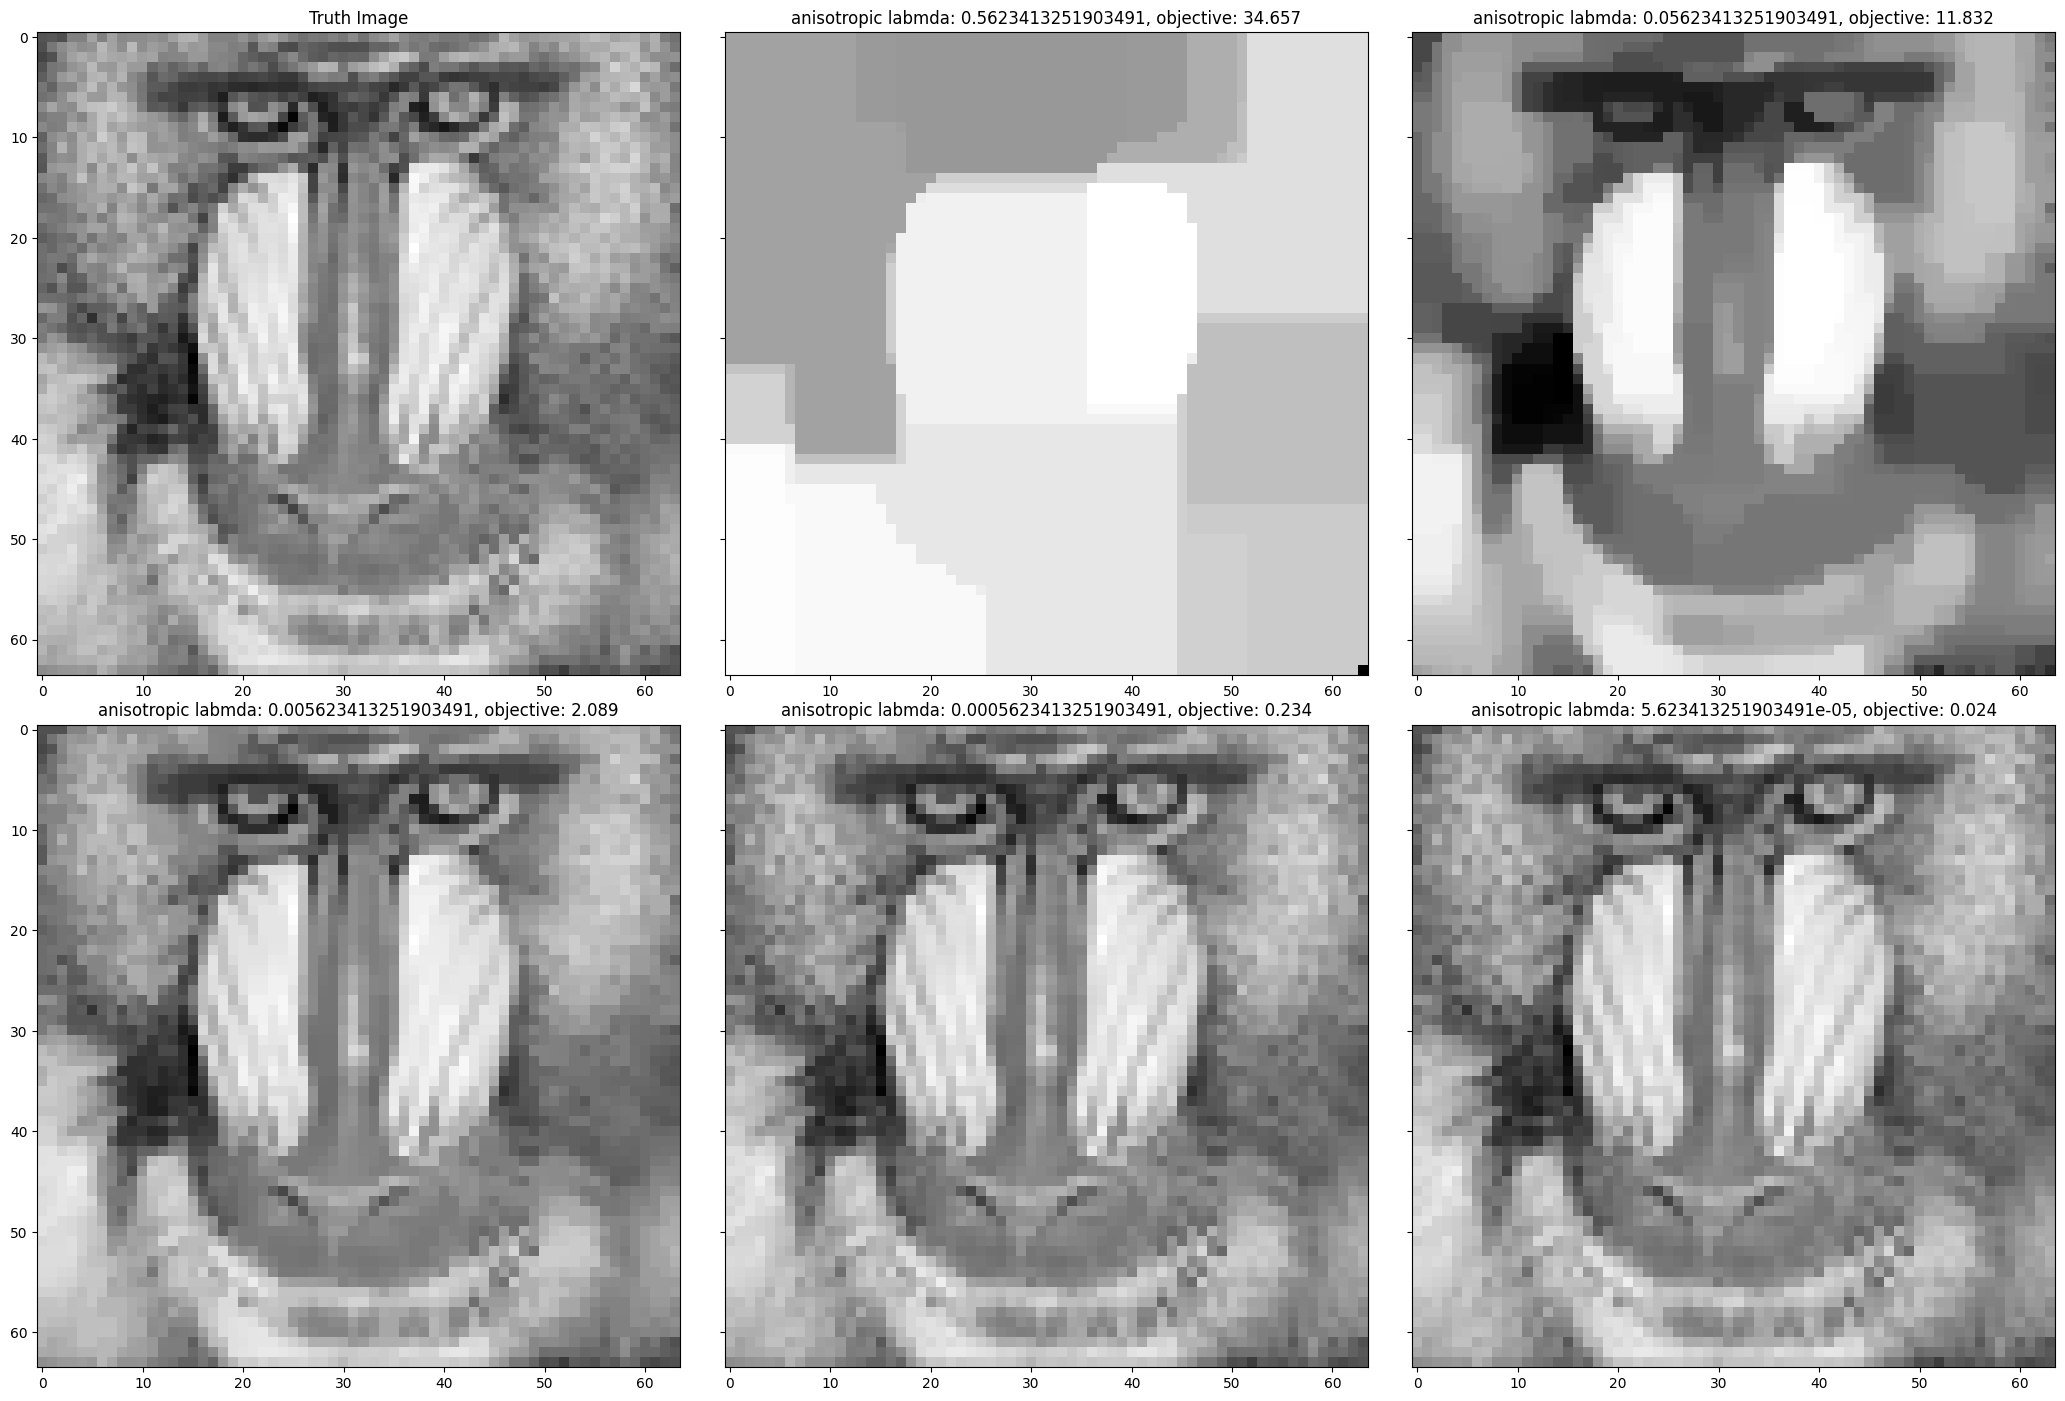

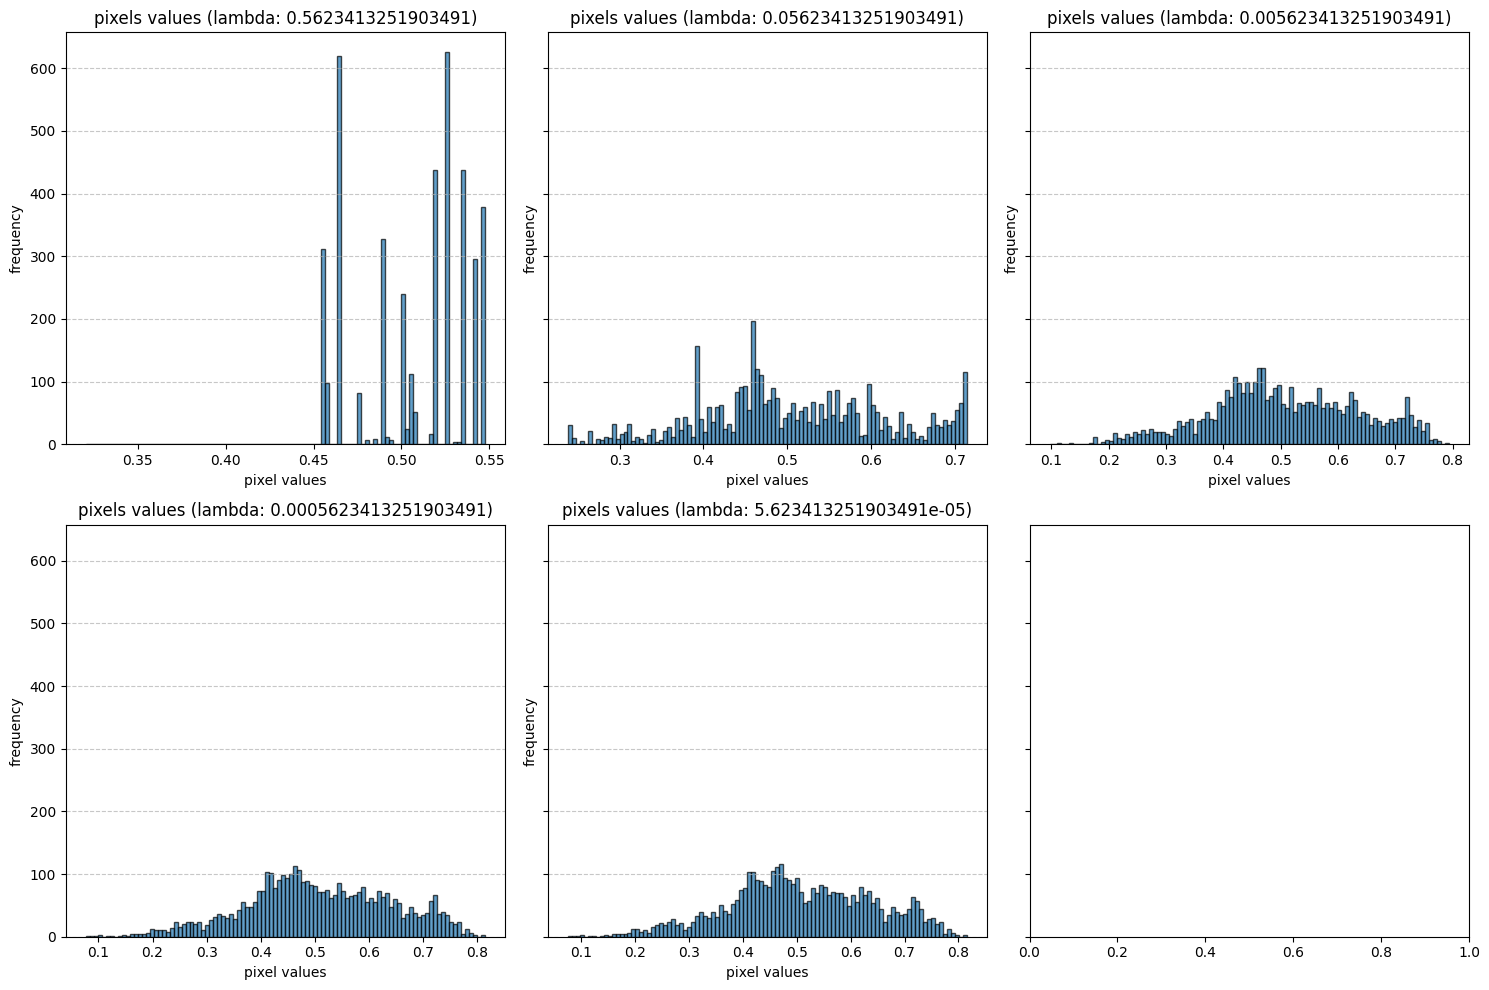

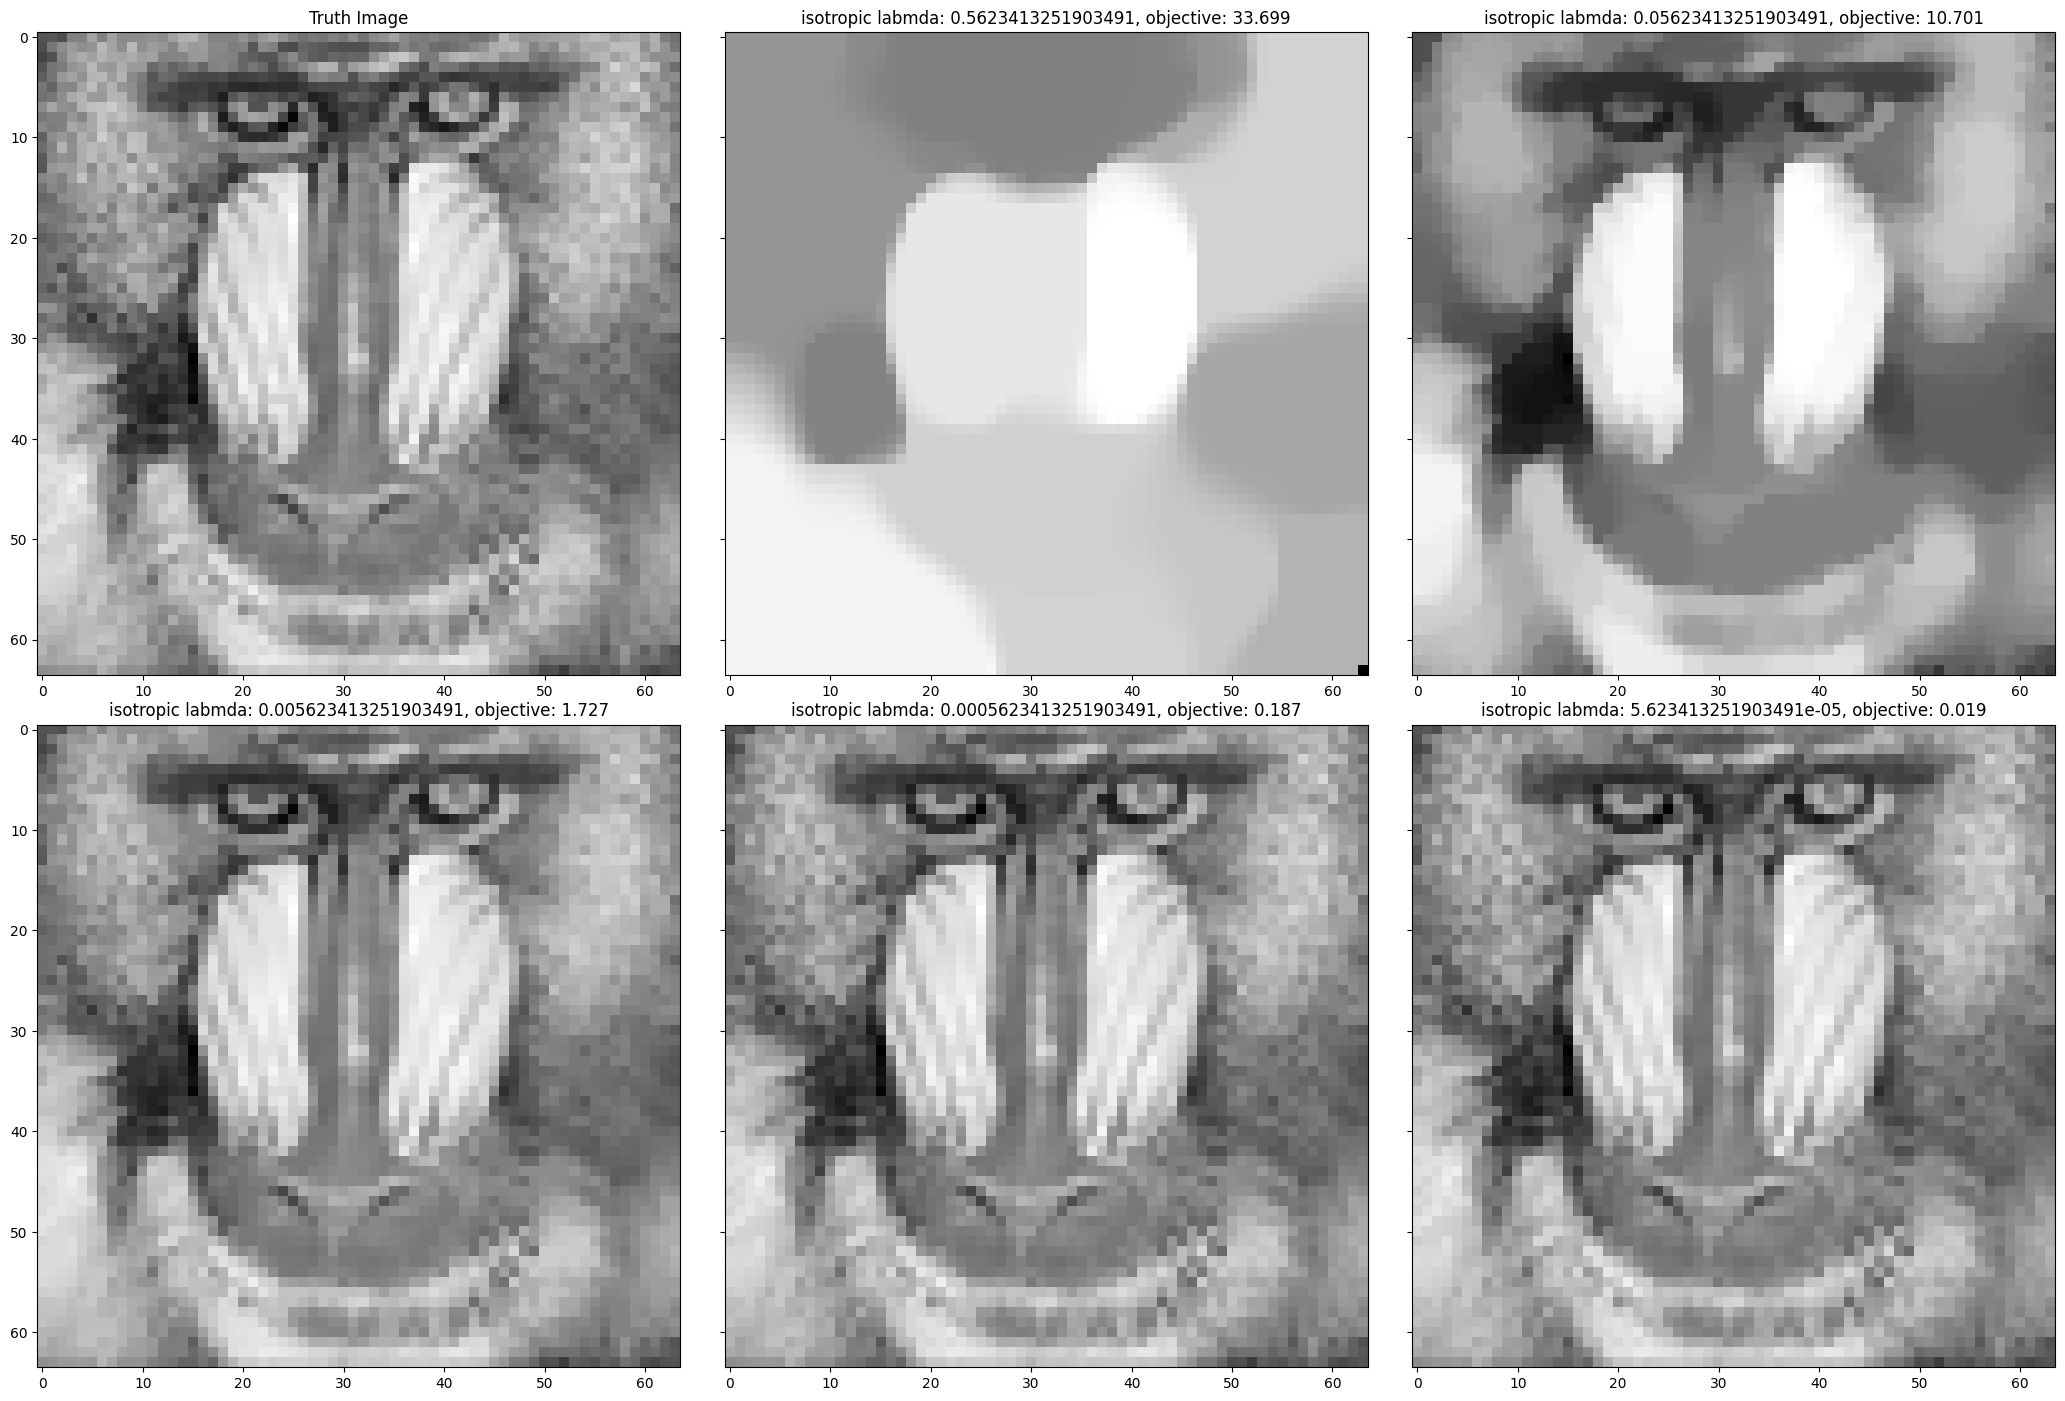

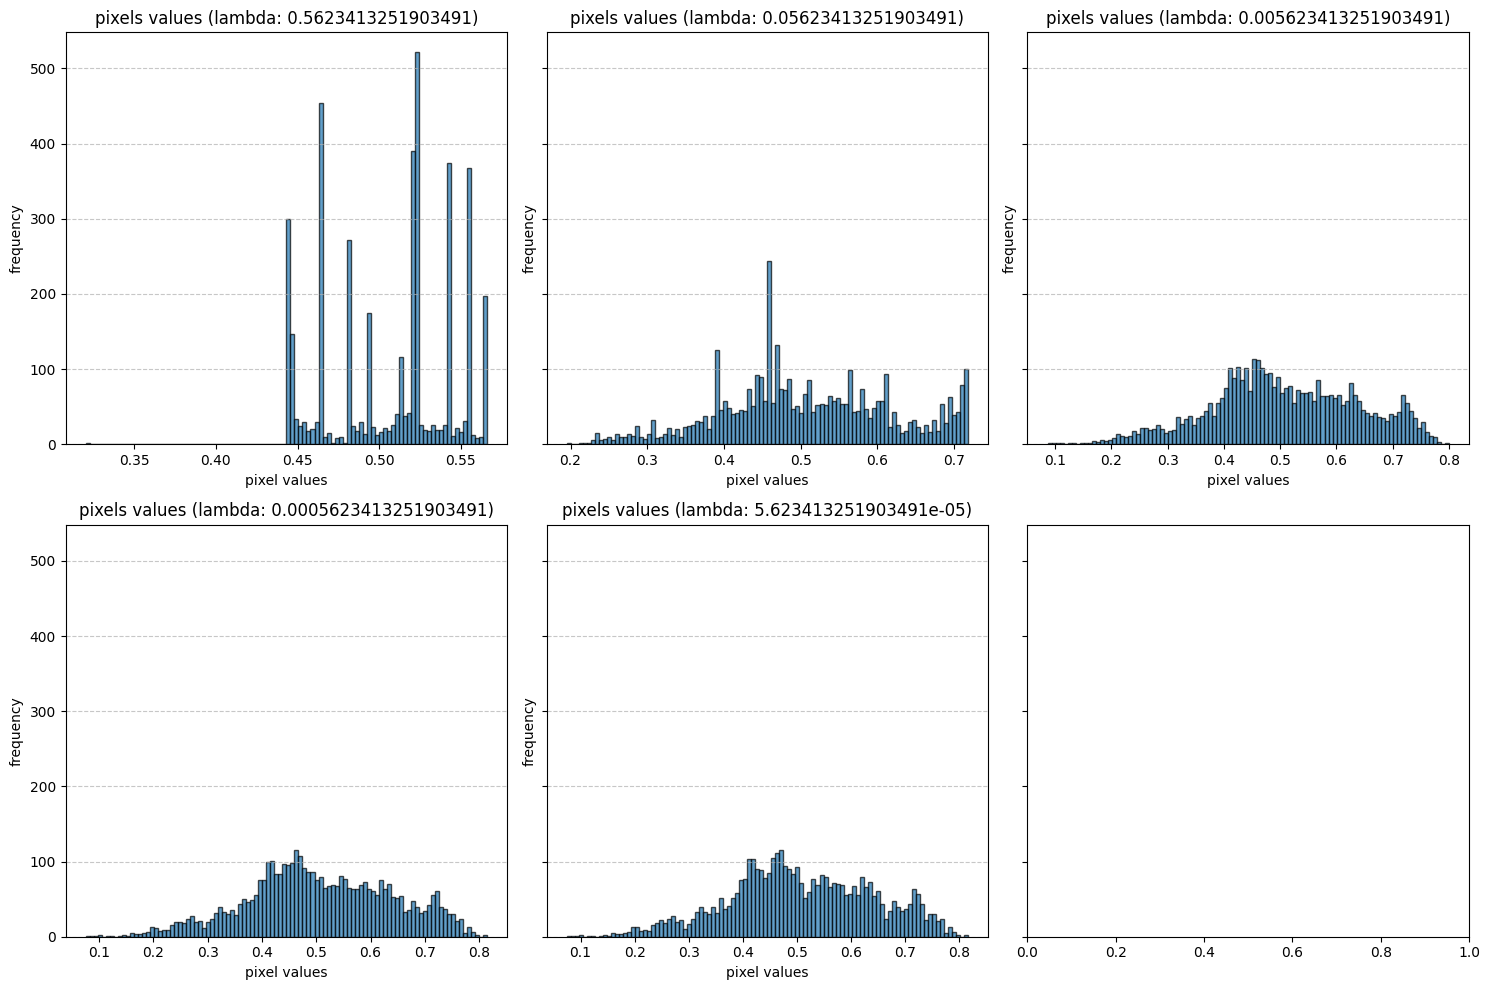

In [20]:
lambdas = [10**(-0.25-i) for i in range(5)]

theta = cp.Variable(y.shape)
lambd = cp.Parameter(nonneg=True)

objective_fn = 0.5 * cp.norm(y - theta, 'fro')**2

h_diff = cp.diff(theta, axis=0)[:, :-1].flatten('F')
v_diff = cp.diff(theta, axis=1)[:-1, :].flatten('F')

thet = cp.vstack([h_diff, v_diff])

thet = cp.vstack([h_diff, v_diff])

norm1 = cp.norm(thet, p=1, axis=0)
norm2 = cp.norm(thet, p=2, axis=0)

regularizer1 = lambd * cp.sum(norm1)
regularizer2 = lambd * cp.sum(norm2)

objective1 = cp.Minimize(objective_fn + regularizer1)
objective2 = cp.Minimize(objective_fn + regularizer2)

problem1 = cp.Problem(objective1)
problem2 = cp.Problem(objective2)

objective_values1 = []
theta_values1 = []

objective_values2 = []
theta_values2 = []

y_image = image

for l in lambdas:
    lambd.value = l
    
    problem1.solve()
    objective_values1.append(problem1.value)
    theta_values1.append(theta.value)

    problem2.solve()
    objective_values2.append(problem2.value)
    theta_values2.append(theta.value)

plot_images(y_image, theta_values1, name='anisotropic', lambdas=lambdas, objectives=objective_values1)
plot_hist(lambdas, theta_values1)


plot_images(y_image, theta_values2, name='isotropic', lambdas=lambdas, objectives=objective_values2)
plot_hist(lambdas, theta_values2)